# Choosing the right chart

![](https://static1.squarespace.com/static/55b6a6dce4b089e11621d3ed/t/55dbac72e4b000099dccf405/1440459893535/)


What is the right graph for my situation? The answer is always the same: **Whatever will be easiest for my audience to read.**

There are many different types of graphs and visual displays but something to remember is that the fact that you have some numbers does not mean you need a graph. Simple text can be a great way to communicate too. In this section, we look at data from [Knaflic, Cole. Storytelling With Data: A Data Visualization Guide for Business Professionals, Wiley, © 2015.](http://www.storytellingwithdata.com/book/downloads), and have a look at two visual displays of the same data, with the goal of determining which graph is easiest to read...in my opinion at least.

## 0.1 Data Story Telling
In most cases, analytics requires us to be in the exploratory phase...which is what one does to understand and figure out what might be noteworthy or interesting to highlight to others. However, presenting the results from our EDA, requires us to be in the explanatory phase, implying you have a specific thing that you want to explain to your target audience...a specific story you want to tell.

Ideally we would like to be able to turn the data into information that can be consumed by an audience with relative ease.

## **2.1 Who, what, and how**

Once the need to communicate is deemed necessary, the are then three steps one should think about and be clear on before visualizing any data:

* **<font color=blue>Who</font>**
    * Your audience
    The more specific you can be about who your audience is, the better position you will be in for succesful communication. The more you know about your audience, the better position you'l be to understand how best to resonate with them
    * You
    The relationship that you have with the audience also matters and how you expect that they will perceive you? Do they already trust you as an expert or do you need to work to establish credibility?
* **<font color=blue>What</font>**
    * Action
    What do you need your audience to know or do?. If you simply present data, it's easy for the audience to say "Oh, that's interesting" and move on to the next thing. But if you ask for action, your audience has to make a decision to comply or not. When it really isn't appropriate to to recommend an action explicitly, encourage discussion towards one.

* **<font color=blue>How</font>**
    * Once, we have articulated who our audience is and what we need them to know or do - we can turn to the data. Data becomes supporting evidence of the story you will build and tell.
    
* **<font color=blue>Storyboarding</font>**
    * Creating a visual outline of the content you plan to create, can also help in ensuring that the communication you craft is on point.

# 1. Getting Started Matplotlib

<img src="https://matplotlib.org/3.5.1/_static/logo2.svg" width="300"/> Vs. <img src="https://raw.githubusercontent.com/mwaskom/seaborn/master/doc/_static/logo-wide-lightbg.svg" width="300"/>



---



Definisi

Matplotlib :


It is utilized for making basic graphs. Datasets are visualised with the help of bargraphs, histograms, piecharts, scatter plots, lines and so on.

Seaborn:

It is utilized for making basic graphs. Datasets are visualised with the help of bargraphs, histograms, piecharts, scatter plots, lines and so on.


---
Benefit?

*   Matplotlib is well connected with Numpy and Pandas and acts as a graphics package for data visualization in python. Pyplot provides similar features and syntax as in MATLAB. Therefore, MATLAB users can easily study it.
*   Seaborn is more comfortable in handling Pandas data frames. It uses basic sets of methods to provide beautiful graphics in python.




In [ ]:
!pip install squarify

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import squarify
from sklearn import datasets, preprocessing
from matplotlib import ticker

In [ ]:
# get dataset
url_amtrak = 'https://raw.githubusercontent.com/farrelarrizal/PublicDataset/main/amtrak_ridership.csv'
url_ebay = 'https://raw.githubusercontent.com/farrelarrizal/PublicDataset/main/EbayTreemap.csv'
url_mpg = 'https://raw.githubusercontent.com/farrelarrizal/PublicDataset/main/auto-mpg.data'

In [ ]:
# call amtrak data, cek apakah data sudah siap untuk divisualisasikan?
amtrak = pd.read_csv(url_amtrak, usecols=[0, 1]).rename(columns={'Date':'date','Number of passengers':'passengers'})
amtrak

,date,passengers
0,Jan-91,"1,708,917"
1,Feb-91,"1,620,586"
2,Mar-91,"1,972,715"
3,Apr-91,"1,811,665"
4,May-91,"1,974,964"
...,...,...
229,Feb-10,"1,951,410"
230,Mar-10,"2,473,551"
231,Apr-10,NaN
232,May-10,NaN


In [ ]:
amtrak_full = pd.read_csv(url_amtrak)
amtrak_full

In [ ]:
# cek data apa yang kosong?
amtrak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        234 non-null    object
 1   passengers  231 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


In [ ]:
amtrak.isnull()

In [ ]:
amtrak.isnull().sum()

In [ ]:
# data yang nan di drop!
amtrak_new = amtrak.dropna()
amtrak_new

,date,passengers
0,Jan-91,"1,708,917"
1,Feb-91,"1,620,586"
2,Mar-91,"1,972,715"
3,Apr-91,"1,811,665"
4,May-91,"1,974,964"
...,...,...
226,Nov-09,"2,389,841"
227,Dec-09,"2,394,671"
228,Jan-10,"2,032,586"
229,Feb-10,"1,951,410"


In [ ]:
amtrak_new.isnull().sum()

date          0
passengers    0
dtype: int64

# **2.1 Data Visualization**

Graphs for data exploration:

**Basic Plots**
* Line Graphs
* Bar Charts
* Scatterplots

**Distribution Plots**
* Boxplot
* Histogram

## 2.1.1 Basic Plots

### Line Graphs
A line graph is a type of chart used to show information that changes over time. We plot line graphs using several points connected by straight lines.

In [ ]:
# pakai dataset amtrak, lakukan eksploratory cari apakah ada anomali data atau engga sebelum divisualisasi
amtrak_new.head()

,date,passengers
0,Jan-91,1708917
1,Feb-91,1620586
2,Mar-91,1972715
3,Apr-91,1811665
4,May-91,1974964


In [ ]:
# convert data passengers to numeric
amtrak_new['passengers'] = amtrak_new.passengers.str.replace(',','').astype(int)

In [ ]:
# cek amtrak yg udah diubah
amtrak_new['passengers'].info()

<class 'pandas.core.series.Series'>
Int64Index: 231 entries, 0 to 230
Series name: passengers
Non-Null Count  Dtype
--------------  -----
231 non-null    int64
dtypes: int64(1)
memory usage: 3.6 KB


<Axes: xlabel='date'>

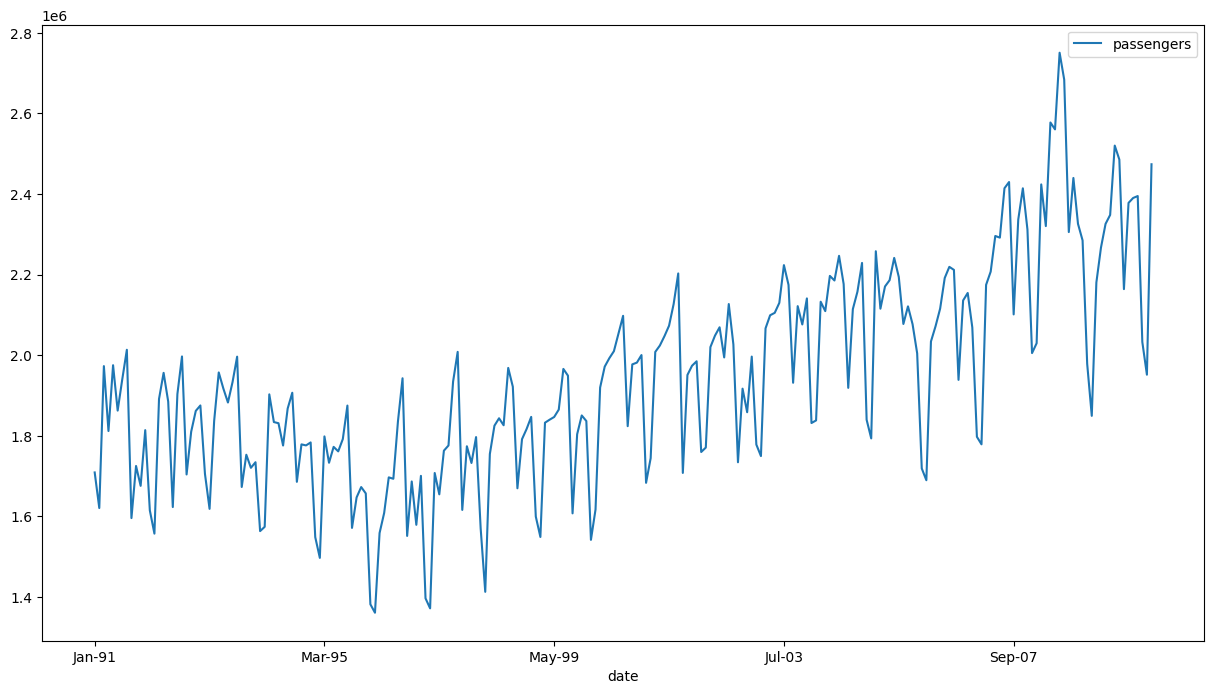

In [ ]:
# Line Graphs
amtrak_new.plot(x='date', y='passengers', figsize=(15,8))

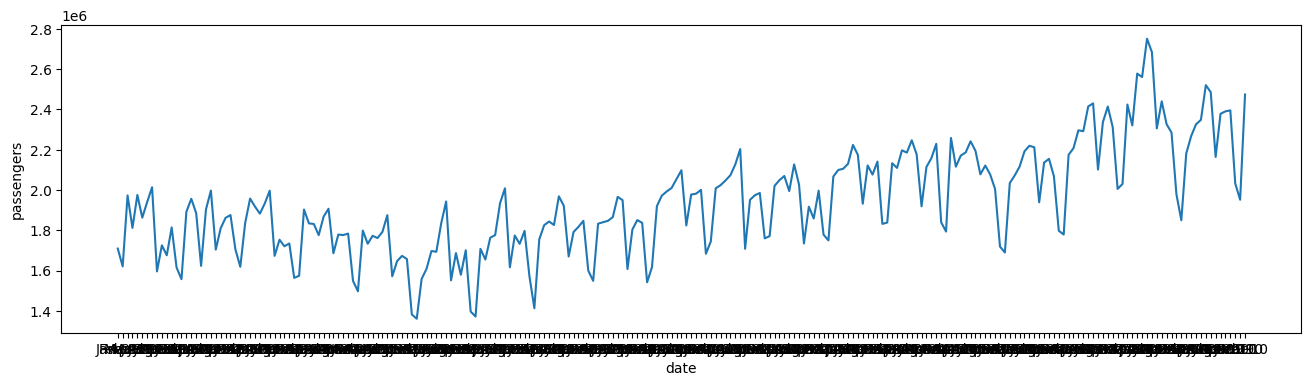

In [ ]:
plt.figure(figsize=(16,4))
sns.lineplot(data=amtrak_new, x='date', y='passengers')
plt.show()

### Bar Chart

In [ ]:
housing_ames

In [ ]:
# pakai dataset housing ames
housing_ames = datasets.fetch_openml(name='house_prices',as_frame=True)
housing_ames.data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,0,0,None,MnPrv,None,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,4,2010,WD,Normal


In [ ]:
housing_ames.data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
housing_ames.data.GarageType.value_counts()

In [ ]:
housing_ames.data.GarageType.value_counts().plot(kind='barh')

<Axes: >

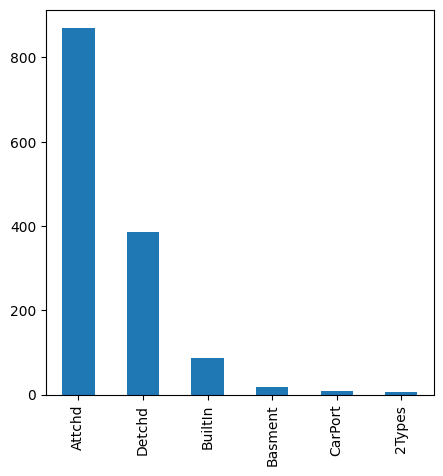

In [ ]:
# bar chart (bar / barh)
housing_ames.data.GarageType.value_counts().plot(kind='bar', figsize=(5,5))

In [ ]:
sns.barplot(x=housing_ames.data.GarageType.value_counts().index, y=housing_ames.data.GarageType.value_counts().values)

In [ ]:
housing_ames.data.BldgType.value_counts().plot(kind='bar')

### Scatterplot
Scatter Plot sering juga disebut dengan grafik sebar, adalah penggunaan titik-titik untuk mewakili nilai untuk dua variabel numerik yang berbeda. Posisi setiap titik pada sumbu horizontal dan vertikal menunjukkan nilai untuk titik data individual. Scatter plot digunakan untuk mengamati hubungan antar variabel.


In [ ]:
# ambil  dataset california housing via sklearn.datasets
housing = datasets.fetch_california_housing()
housing

In [ ]:
housing['feature_names']

In [ ]:
housing['data']

In [ ]:
housing_df = pd.DataFrame({housing['feature_names'][i]:housing['data'][:,i]
                           for i in range(len(housing['feature_names']))})
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
housing_df.info()

<Axes: xlabel='latitude', ylabel='longitude'>

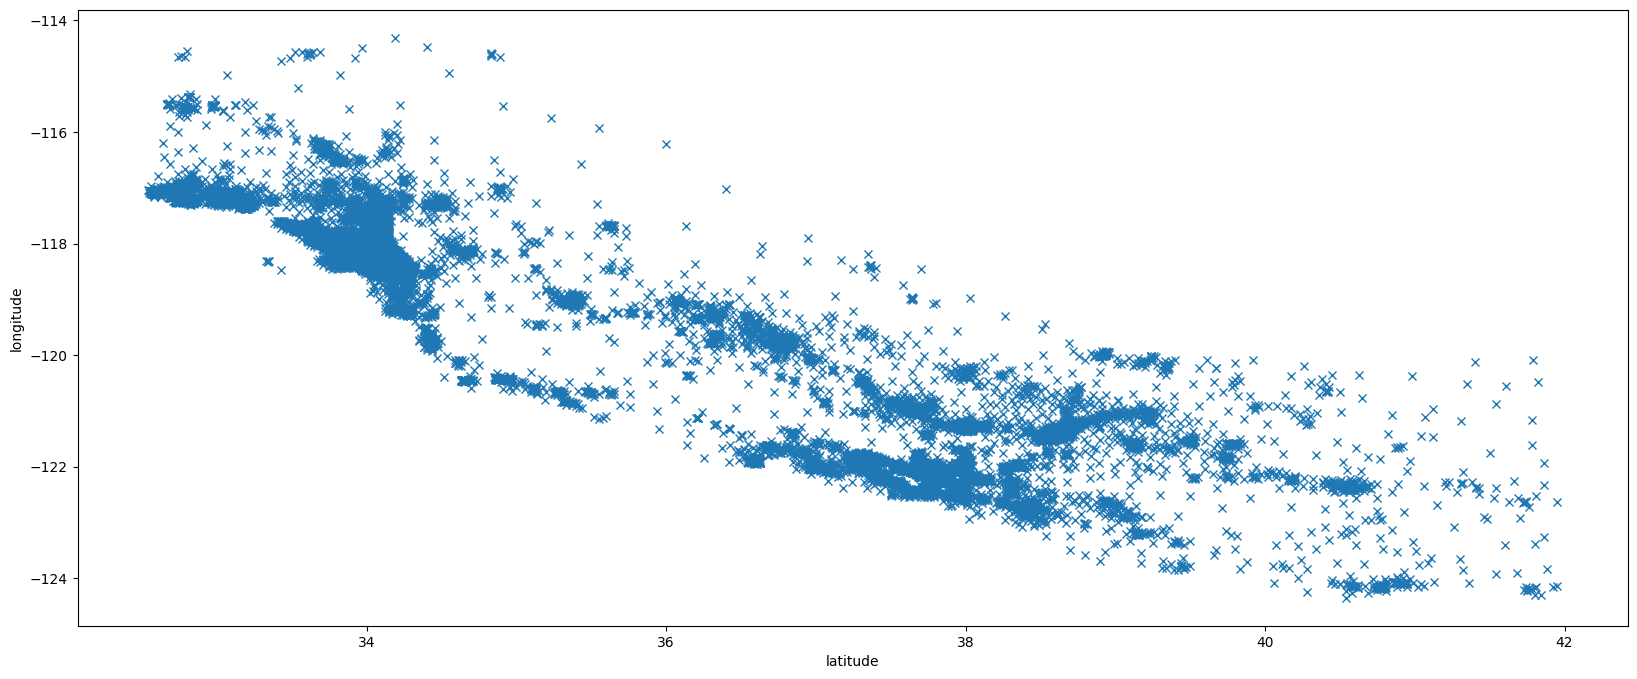

In [ ]:
housing_df.plot(x='Latitude', y='Longitude', style='x', figsize=(20,8), ylabel='longitude', xlabel='latitude', legend=False)

<Axes: xlabel='Latitude', ylabel='Longitude'>

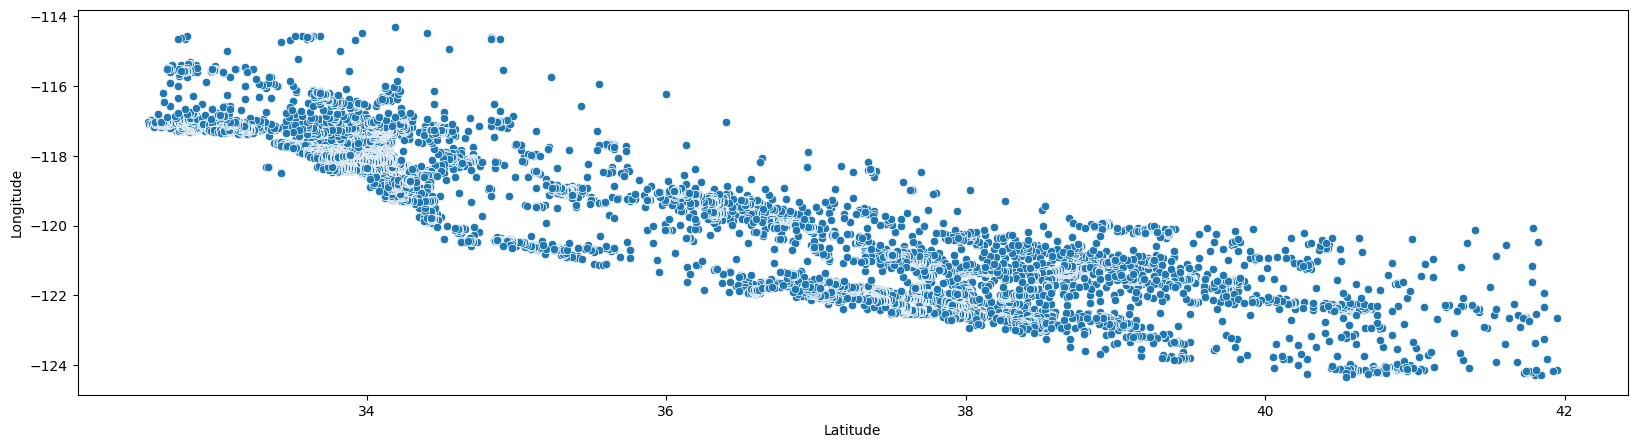

In [ ]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=housing_df, x='Latitude', y='Longitude')


## 2.1.2 Distribution Plots

### Histogram
histogram adalah tampilan grafis dari tabulasi frekuensi yang digambarkan dengan grafis batangan sebagai manifestasi data binning. Tiap tampilan batang menunjukkan proporsi frekuensi pada masing-masing deret kategori yang berdampingan dengan interval yang tidak tumpang tindih.

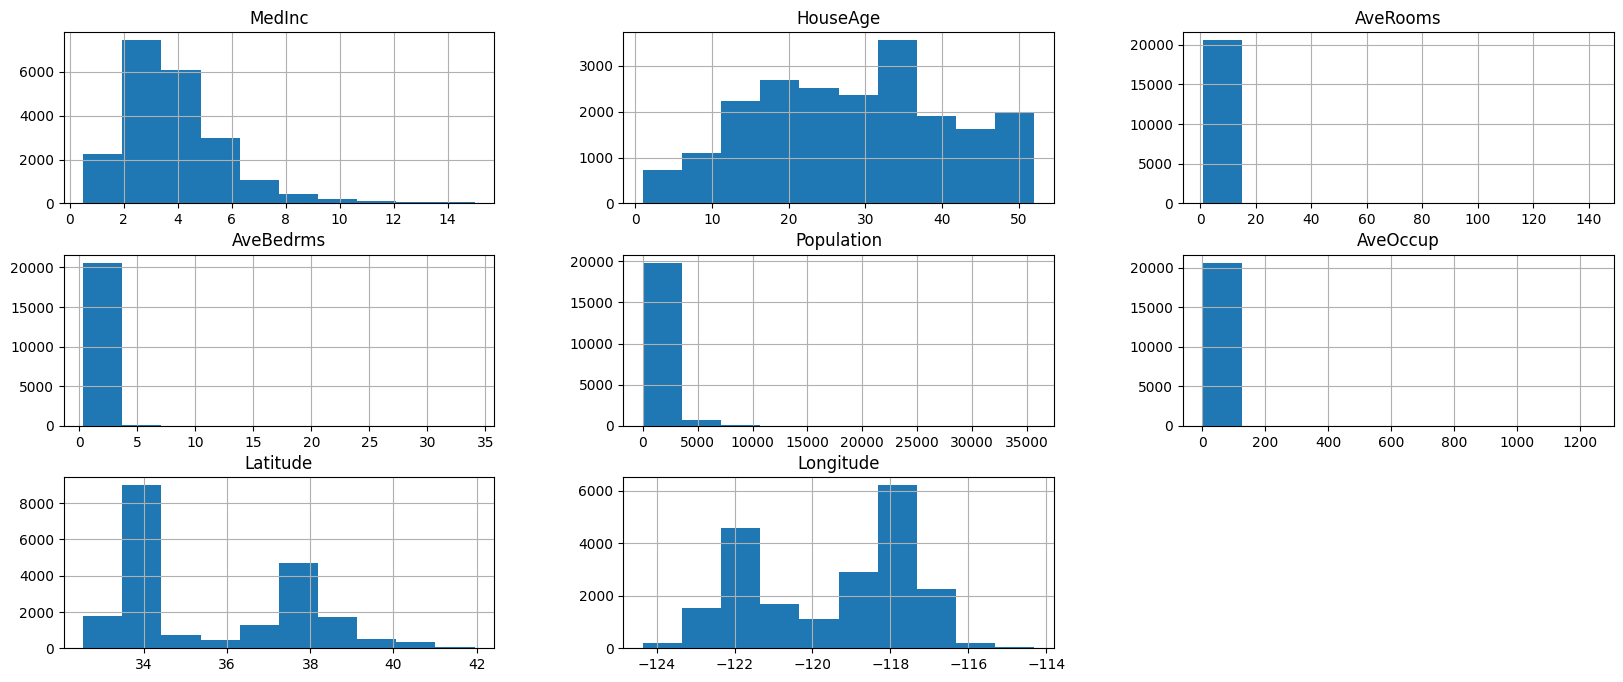

In [ ]:
fig, axis = plt.subplots(figsize=(20,8))
housing_df.hist(ax=axis)
plt.show()

<Axes: >

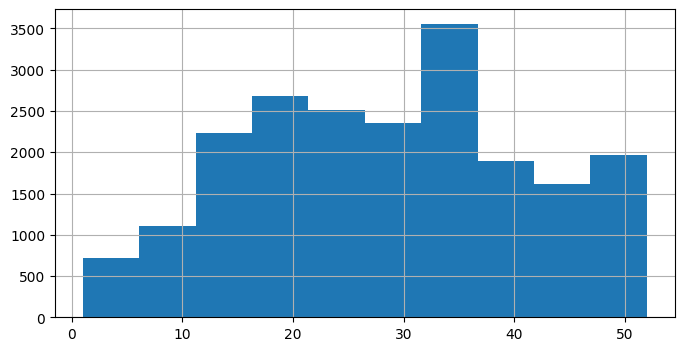

In [ ]:
fig, axis = plt.subplots(figsize=(8,4))
housing_df.HouseAge.hist(ax=axis)

In [ ]:
housing_df.HouseAge.hist(figsize=(8,4))

In [ ]:
housing_df.HouseAge.hist(edgecolor="black")

### Boxplot

Boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles.

<Axes: >

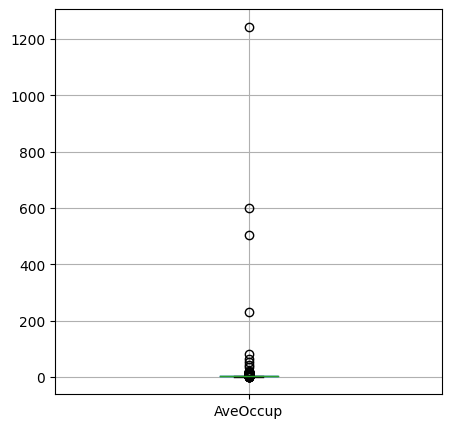

In [ ]:
housing_df.boxplot('AveOccup', figsize='5,5')

In [ ]:
housing_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
# masih pake dataset california housing
# boxplot
for col in housing_df:
  print(col)

In [ ]:
for col in housing_df:
  housing_df.boxplot(column=col)
  plt.show()

### Heatmap
Heat Maps are graphical representations of data that utilize color-coded systems. The primary purpose of Heat Maps is to better visualize the volume of locations/events within a dataset and assist in directing viewers towards areas on data visualizations that matter most.

In [ ]:
# pakai dataset flights
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


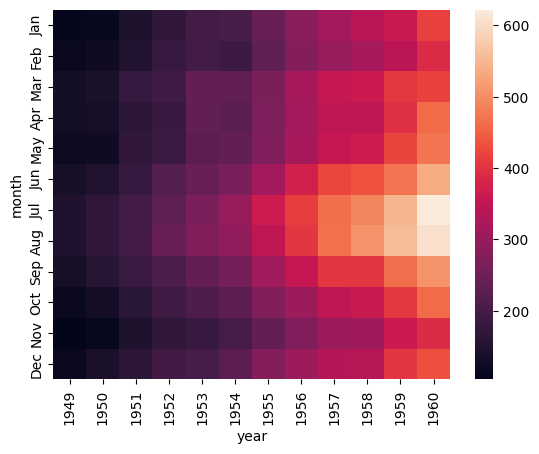

In [ ]:
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

In [ ]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [ ]:
# Heatmap


###  Correlation Heatmaps
A correlation heatmap is a graphical representation of a correlation matrix representing the correlation between different variables. The value of correlation can take any value from -1 to 1. Correlation between two random variables or bivariate data does not necessarily imply a causal relationship.

<Axes: >

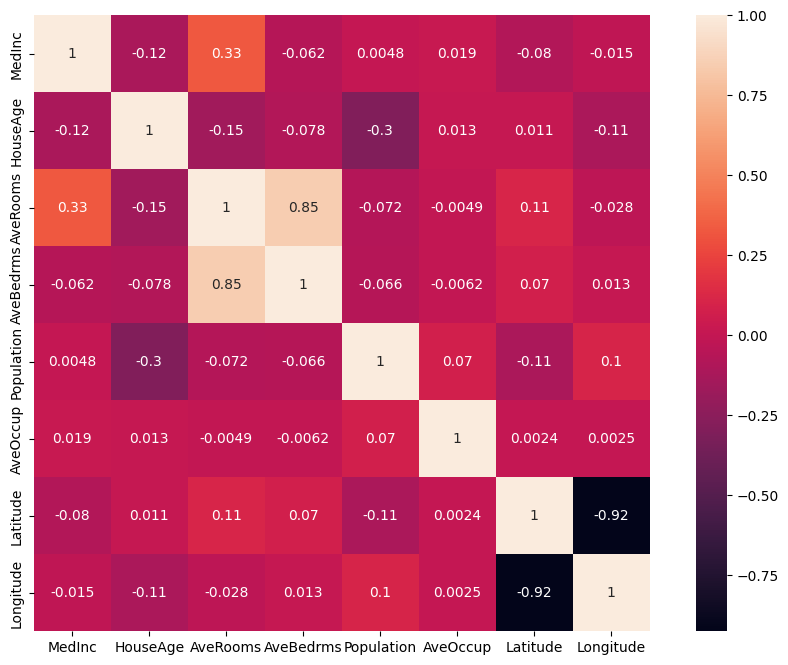

In [ ]:
corrmat = housing_df.corr()
f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corrmat, square=True, annot=True)

In [ ]:
corrmat

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [ ]:
corrmat = housing_df.corr()
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corrmat, square=True, annot=True);

## Treemap
Treemaps are often used for sales data, as they capture relative sizes of data categories, allowing for quick perception of the items that are large contributors to each category. Color can identify items that are underperforming (or overperforming) compared to their siblings from the same category.

In [ ]:
# pakai datset ebay
ebay = pd.read_csv(url_ebay)

In [ ]:
ebay

In [ ]:
ebay.head()

In [ ]:
ebay_by_brand = ebay.groupby('Brand', as_index=False)[['High Bid', 'Seller Feedback']].mean()

In [ ]:
ebay_by_brand.sort_values('High Bid', ascending=False, inplace=True)

In [ ]:
ebay_by_brand.head()

,Brand,High Bid,Seller Feedback
16,Rolex_Wristwatch,2332.501019,438.872283
5,Cartier_Wristwatch,891.359882,581.347059
7,Celestron_Telescope,402.059423,616.096154
17,Rookwood_Vase,270.434623,539.095477
1,Bausch_and_Laumb_Microscope,172.960857,676.251429


In [ ]:
ebay.groupby('Brand').value_counts()

Brand                       High Bid  Seller Feedback  Category                      Sub-Category
American_Tourister_Luggage  15.50     4552             Luggage                       Luggage bags    2
                            1.76      443              Luggage                       Luggage bags    1
                            16.49     375              Luggage                       Luggage bags    1
                            16.51     44               Luggage                       Luggage bags    1
                            17.00     42               Luggage                       Luggage bags    1
                                                                                                    ..
Zegna_Tie                   26.00     362              Clothing shoes & accessories  Neck ties       1
                                      385              Clothing shoes & accessories  Neck ties       1
                                      415              Clothing shoes & access

In [ ]:
ebay.groupby('Brand')[['High Bid', 'Seller Feedback']].mean().sort_values(by='High Bid',ascending=False).head()

,High Bid,Seller Feedback
Brand,,
Rolex_Wristwatch,2332.501019,438.872283
Cartier_Wristwatch,891.359882,581.347059
Celestron_Telescope,402.059423,616.096154
Rookwood_Vase,270.434623,539.095477
Bausch_and_Laumb_Microscope,172.960857,676.251429


In [ ]:
# distandarkan nilai nya agar tidak menjadi data outlier
hue = preprocessing.minmax_scale(ebay_by_brand['Seller Feedback'].values.reshape((1, -1)), axis=1).reshape(-1)

In [ ]:
hue

array([0.06706685, 0.14723982, 0.16679373, 0.12346414, 0.20064413,
       0.20151184, 0.42797237, 0.15813631, 0.03508016, 0.04034661,
       0.22943701, 0.23864507, 0.06643341, 0.604069  , 1.        ,
       0.10080387, 0.14800728, 0.        , 0.02519337, 0.1275154 ,
       0.1799362 , 0.10122647, 0.13489687, 0.29450422, 0.19733008,
       0.17224928, 0.61852883])

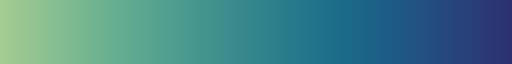

In [ ]:
# buat warna pembeda
colors = sns.color_palette("crest", as_cmap=True)
colors

In [ ]:
plt.figure(figsize=(20, 12))
squarify.plot(sizes=ebay_by_brand['High Bid'], label=ebay_by_brand['Brand'],
              color=colors(hue), alpha=1.)
plt.axis('off')
plt.show()

## Class Activity 2
Buatlah interpretasi dan kesimpulan dari Dataset berikut dalam waktu 15 Menit, carilah insight yang berguna dengan menerapkan cara-cara seperti yang sudah dilakukan diatas!

In [ ]:
url_covid = 'https://raw.githubusercontent.com/farrelarrizal/PublicDataset/main/covid.csv'
covid = pd.read_csv(url_covid)

In [ ]:
covid

,country,total_cases,confirmed,new_cases,deaths,new_deaths,recovered,active,active_cases,critical,total_tests,total_tests_per_million,total_cases_per_million,total_deaths_per_million,population
0,0,721,721,0.0,15,0.0,706.0,0.0,0.0,0.0,0,0,0,0,0
1,USA,44518437,44518437,NaN,719933,NaN,33938147.0,9860357.0,9860357.0,19236.0,644748656,0,133514,2159,333437210
2,India,33845586,33845586,11343.0,449214,185.0,33134292.0,262080.0,262080.0,8944.0,574252400,0,24227,322,1397013045
3,Brazil,21468121,21468121,NaN,597986,NaN,20442653.0,427482.0,427482.0,8318.0,63776166,0,100106,2788,214454297
4,UK,7900680,7900680,NaN,136953,NaN,6417660.0,1346067.0,1346067.0,815.0,304621001,0,115620,2004,68333332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,China,96258,96258,27.0,4636,NaN,90765.0,857.0,857.0,4.0,160000000,0,67,3,1439323776
224,Brunei,7904,7904,188.0,60,4.0,5501.0,2343.0,2343.0,32.0,374059,0,17853,136,442731
225,Taiwan,16255,16255,5.0,844,1.0,15255.0,156.0,156.0,0.0,6472449,0,681,35,23870870
226,Cambodia,113475,113475,219.0,2406,23.0,104865.0,6204.0,6204.0,0.0,2450556,0,6672,141,17008855


In [ ]:
covid.fillna(0)

In [ ]:
covid.info()

In [ ]:
covid.isnull().sum()

In [ ]:
covid_new = covid.fillna(0)

In [ ]:
covid_new.isnull().sum()

country                     0
total_cases                 0
confirmed                   0
new_cases                   0
deaths                      0
new_deaths                  0
recovered                   0
active                      0
active_cases                0
critical                    0
total_tests                 0
total_tests_per_million     0
total_cases_per_million     0
total_deaths_per_million    0
population                  0
dtype: int64

Pertama-tama, tampilkan 10 baris awal dari data tersebut.

In [ ]:
# Your Code Here
covid_new.head(10)

,country,total_cases,confirmed,new_cases,deaths,new_deaths,recovered,active,active_cases,critical,total_tests,total_tests_per_million,total_cases_per_million,total_deaths_per_million,population
0,0,721,721,0.0,15,0.0,706.0,0.0,0.0,0.0,0,0,0,0,0
1,USA,44518437,44518437,0.0,719933,0.0,33938147.0,9860357.0,9860357.0,19236.0,644748656,0,133514,2159,333437210
2,India,33845586,33845586,11343.0,449214,185.0,33134292.0,262080.0,262080.0,8944.0,574252400,0,24227,322,1397013045
3,Brazil,21468121,21468121,0.0,597986,0.0,20442653.0,427482.0,427482.0,8318.0,63776166,0,100106,2788,214454297
4,UK,7900680,7900680,0.0,136953,0.0,6417660.0,1346067.0,1346067.0,815.0,304621001,0,115620,2004,68333332
5,Russia,7612317,7612317,25781.0,210801,883.0,6740491.0,661025.0,661025.0,2300.0,193700000,0,52135,1444,146012999
6,Turkey,7238267,7238267,0.0,64661,0.0,6686246.0,487360.0,487360.0,633.0,87366730,0,84681,756,85476611
7,France,7027059,7027059,0.0,116798,0.0,6790335.0,119926.0,119926.0,1355.0,143234831,0,107358,1784,65454753
8,Iran,5638735,5638735,14607.0,121347,238.0,5115796.0,401592.0,401592.0,5727.0,32619228,0,66074,1422,85340085
9,Argentina,5259738,5259738,0.0,115245,0.0,5123173.0,21320.0,21320.0,1052.0,24252818,0,115053,2521,45715732


Dari data tersebut, buatlah visualisasi yang Anda inginkan untuk mendapatkan insight dari data. (Catatan: langkah ini tidak selalu perlu dilakukan, namun untuk meminimalisir error yang mungkin terjadi, Anda dapat terlebih dahulu menghapus kolom-kolom yang mengandung nilai NaN. Lihat notebook Hands-on #1 mengenai cara untuk melakukannya.)

<Axes: xlabel='Total case', ylabel='population'>

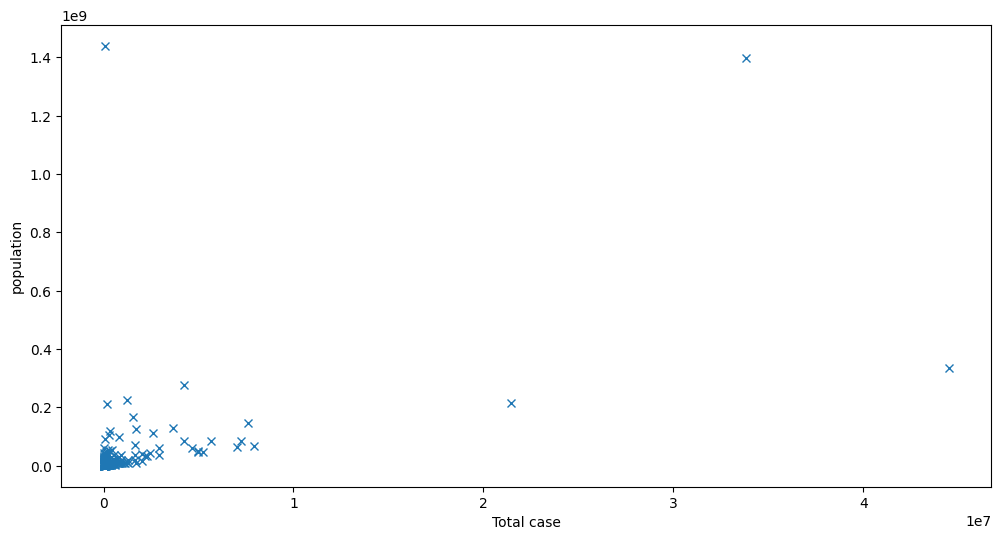

In [ ]:
# Your Code Here
covid_new.plot(x='total_cases', y='population', style='x', figsize=(12,6), ylabel='population', xlabel='Total case', legend=False)

In [ ]:
covid_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   228 non-null    object 
 1   total_cases               228 non-null    int64  
 2   confirmed                 228 non-null    int64  
 3   new_cases                 228 non-null    float64
 4   deaths                    228 non-null    int64  
 5   new_deaths                228 non-null    float64
 6   recovered                 228 non-null    float64
 7   active                    228 non-null    float64
 8   active_cases              228 non-null    float64
 9   critical                  228 non-null    float64
 10  total_tests               228 non-null    int64  
 11  total_tests_per_million   228 non-null    int64  
 12  total_cases_per_million   228 non-null    int64  
 13  total_deaths_per_million  228 non-null    int64  
 14  population

<Axes: xlabel='population', ylabel='total_cases'>

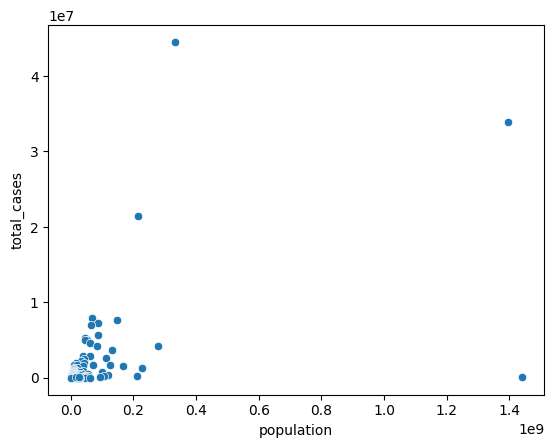

In [ ]:
sns.scatterplot(data=covid_new , x='population', y='total_cases')

## Feedback


* intip.in/QnaPma
* intip.in/FeedbackPma

# References:
![](https://media.takealot.com/takealot/covers_isbn/9781119002253-pdpxl.jpg)

- [Knaflic, Cole. Storytelling With Data: A Data Visualization Guide for Business Professionals, Wiley, © 2015.](http://www.storytellingwithdata.com/book/downloads)

- [Original Notebook by phillipheita](https://www.kaggle.com/phillipheita/storytelling-with-data)

- https://colab.research.google.com/github/ageron/handson-ml2/blob/master/tools_matplotlib.ipynb#scrollTo=6W9UwScTk8xY